<h1>Logistic Regression</h1>

# import libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
%matplotlib inline

In [107]:
fruits = pd.read_table('../course3/assets/fruit_data_with_colors.txt')
fruits.head(3)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60


In [108]:
X_fruits_2d = fruits[["width", "height"]]
y_fruits_2d = fruits['fruit_label']

In [109]:
print("shape of X_fruits_2d:", X_fruits_2d.shape)
print("shape of y_fruits_2d:", y_fruits_2d.shape)

shape of X_fruits_2d: (59, 2)
shape of y_fruits_2d: (59,)


In [110]:
print("values of X_fruits_2d: \n{} ".format(X_fruits_2d.head(4)))
print("values of y_fruits_2d: \n{} ".format(y_fruits_2d.head(4)))

values of X_fruits_2d: 
   width  height
0    8.4     7.3
1    8.0     6.8
2    7.4     7.2
3    6.2     4.7 
values of y_fruits_2d: 
0    1
1    1
2    1
3    2
Name: fruit_label, dtype: int64 


In [111]:
print("matrics values of X_fruits_2d: \n{} ".format(X_fruits_2d.values[0:3]))
print("matrics values of y_fruits_2d: \n{} ".format(y_fruits_2d.values[0:3]))


matrics values of X_fruits_2d: 
[[8.4 7.3]
 [8.  6.8]
 [7.4 7.2]] 
matrics values of y_fruits_2d: 
[1 1 1] 


score of training: 0.75
score of testing: 0.6666666666666666
A fruit with height 6 and width 8 is predicted to be: not an apple
A fruit with height 10 and width 7 is predicted to be: an apple


Text(0.5, 0, 'Width')

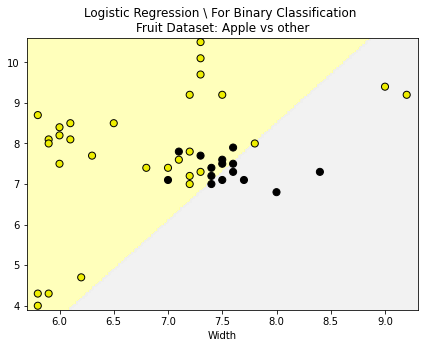

In [112]:

from sklearn.linear_model import LogisticRegression 
from adspy_shared_utilities import (plot_class_regions_for_classifier_subplot)

y_fruits_apple = y_fruits_2d == 1   # binary problem: apples (1) vs everything else (0)

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d.values, y_fruits_apple.values, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)
print("score of training:", clf.score(X_train, y_train))
print("score of testing:", clf.score(X_test, y_test))

fig, subaxes = plt.subplots(1, 1, figsize = (7,5))
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, 'Logistic Regression \ For Binary Classification \nFruit Dataset: Apple vs other', 
                                          subaxes)


h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][int(clf.predict([[h,w]])[0])]))

h = 10
w = 7
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][int(clf.predict([[h,w]])[0])]))

subaxes.set_xlabel('Height')
subaxes.set_xlabel('Width')


# Logistic Regression with L-2 Regularization

In [113]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_cancer, y_cancer = load_breast_cancer(return_X_y = True)

print("No of Features:", X_cancer.shape)
print("Targets:", y_cancer.shape)

print("Value of X_cancer:\n {}".format(X_cancer[0:4]))
print("Value of y_cancer:\n {}".format(y_cancer[0:10]))

No of Features: (569, 30)
Targets: (569,)
Value of X_cancer:
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.1

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state =0)
clf = LogisticRegression().fit(X_train, y_train)
print("score of training:", clf.score(X_train, y_train))
print("score of testing:", clf.score(X_test, y_test))

score of training: 0.9483568075117371
score of testing: 0.9440559440559441


# Support Vector Machine (SVM)

<h2>Create Dataset</h2>

In [115]:
from sklearn.datasets import make_classification, make_blobs

In [116]:
X_C1, y_C1 = make_classification(n_samples = 100, n_features =2,
                                 n_redundant = 0, n_informative = 2, 
                                 n_clusters_per_class = 1, flip_y = 0.1,
                                 class_sep = 0.5, random_state = 0)

In [117]:
print("values of features (X_C1: \n {}".format(X_C1[0:5]))
print("Shape of features (X_C1): \n {}".format(X_C1.shape))
print("values of target (y_C1): \n {}".format(y_C1[0:10]))
print("Shape of target (y_C1): \n {}".format(y_C1.shape))

values of features (X_C1: 
 [[ 0.37163989 -0.92276158]
 [-0.1617182   0.51386743]
 [-1.63650855  2.23389996]
 [ 0.62041909 -2.18941375]
 [-0.98718544  1.93299453]]
Shape of features (X_C1): 
 (100, 2)
values of target (y_C1): 
 [0 0 0 0 0 0 0 0 1 1]
Shape of target (y_C1): 
 (100,)


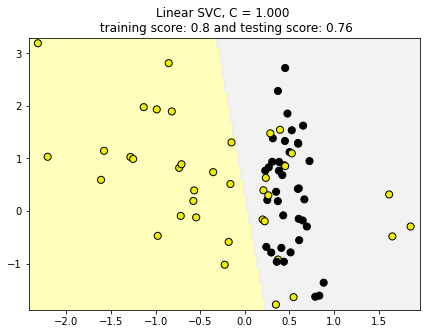

In [118]:
from sklearn.svm import SVC

from adspy_shared_utilities import(plot_class_regions_for_classifier_subplot)

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_C1, y_C1, random_state = 0)


fig, subaxes = plt.subplots(1, 1, figsize = (7,5))
C = 1.0
    
clf = SVC(kernel = 'linear', C = C).fit(X_train, y_train)

title = 'Linear SVC, C = {:.3f} \n training score: {} and testing score: {}'.format(C, clf.score(X_train, y_train), 
                             clf.score(X_test, y_test))


plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

# SVM with Breast Cancer Dataset


<h2> Load Dataset </h2>

In [119]:
from sklearn.datasets import load_breast_cancer

X_cancer, y_cancer= load_breast_cancer  (return_X_y =True)

In [120]:
print("values of features (X_Cancer): \n {}".format(X_cancer))
print("shape of features(X_Cancer): \n {}".format(X_cancer.shape))

print("values of features (y_Cancer): \n {}".format(y_cancer[0:30]))
print("shape of features(y_Cancer): \n {}".format(y_cancer.shape))


values of features (X_Cancer): 
 [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
shape of features(X_Cancer): 
 (569, 30)
values of features (y_Cancer): 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]
shape of features(y_Cancer): 
 (569,)


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0) # bydefault train/test (75/25)

C=1.0
clf = SVC(kernel = "linear", C = C).fit(X_train, y_train)

print("training score: {}".format(clf.score(X_train, y_train)))
print("testing score: {}".format(clf.score(X_test, y_test)))

training score: 0.9671361502347418
testing score: 0.958041958041958


# Multiclass Classification With Linear Model

# Load Dataset

In [136]:
fruits = pd.read_table('../course3/assets/fruit_data_with_colors.txt')
fruits.head(3)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60


In [137]:
X_fruits_2d = fruits[['width', 'height']]
y_fruits_2d = fruits['fruit_label']
                      

In [138]:
y_fruits_2d.unique()

array([1, 2, 3, 4])

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

from sklearn.svm import LinearSVC

clf = LinearSVC(C=5.0, random_state = 0).fit(X_train, y_train)

labels = pd.unique(fruits[['fruit_name', 'fruit_label']].values.ravel())
print("label of fruits:", labels)

print("y-intercept of 4 categories: \n {}".format(clf.intercept_))
print("coefficient of 4 different categories with 2 features: \n {}".format(clf.coef_))



label of fruits: ['apple' 1 'mandarin' 2 'orange' 3 'lemon' 4]
y-intercept of 4 categories: 
 [-3.32533881  1.19605769 -2.67722102  1.1578967 ]
coefficient of 4 different categories with 2 features: 
 [[ 0.71176637 -0.26249164]
 [ 1.15180735 -1.63177826]
 [ 0.3167164  -0.04584849]
 [-1.65484761  1.24319639]]


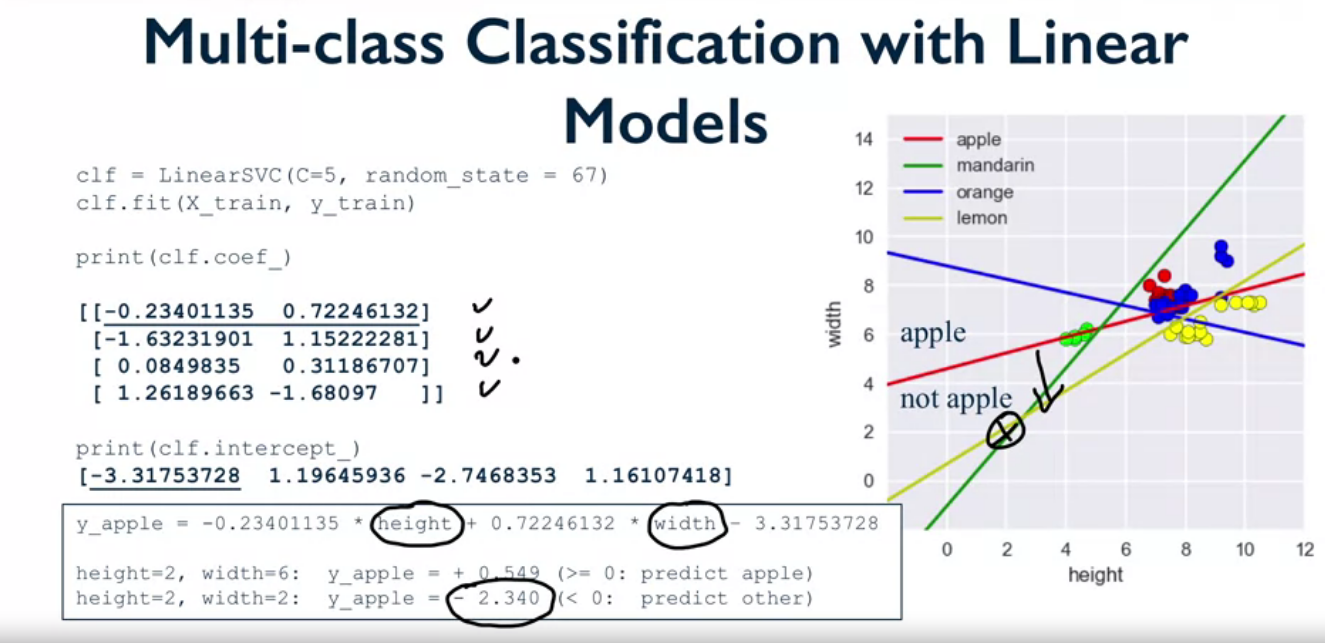

# Kernelized Support Vector Machine(for multiclass and complex classification)

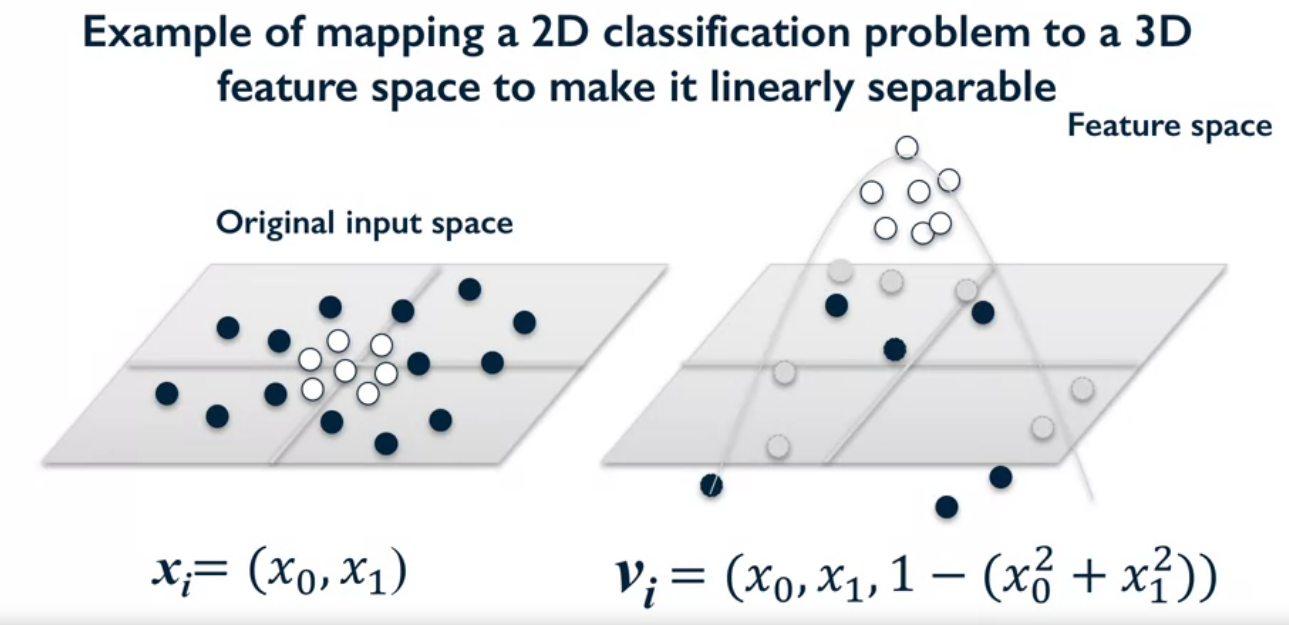


# Import Libaries

In [4]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from adspy_shared_utilities import plot_class_regions_for_classifier




# Create Dataset

In [ ]:
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2

In [13]:
X_D2, y_D2=make_blobs(n_samples = 100, n_features = 2, centers = 8,
                      cluster_std = 1.3, random_state = 4)
print("values of X_D2: \n {}".format(X_D2[0:5]))
print("Unique values of y_D2: \n {}".format(np.unique(y_D2)))

values of X_D2: 
 [[-7.35089746  0.66563488]
 [ 5.46802032 -5.36275188]
 [ 8.55164331  2.95571811]
 [12.23096506  1.45722876]
 [ 5.74847262 -5.74913641]]
Unique values of y_D2: 
 [0 1 2 3 4 5 6 7]


A Kernel is similarity measure (modified dot product) between datapoints. We transform Original Dataset to Feature Space with Higher Dimension


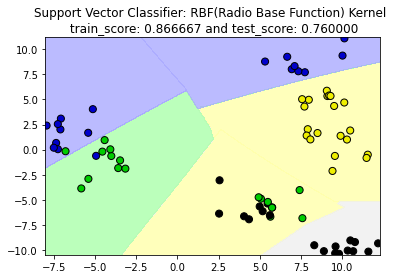

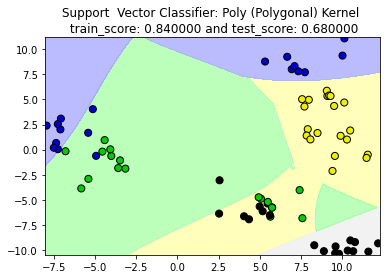

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,random_state=0)

print("A Kernel is similarity measure (modified dot product) between datapoints. We transform Original Dataset to Feature Space with Higher Dimension")

svc_rbf = SVC().fit(X_train, y_train)

plot_class_regions_for_classifier(svc_rbf, X_train, y_train, None, None,
         'Support Vector Classifier: RBF(Radio Base Function) Kernel \n train_score: {:2f} and test_score: {:2f}'
                                  .format(svc_rbf.score(X_train, y_train), svc_rbf.score(X_test, y_test)))



svc_poly = SVC(kernel = 'poly', degree = 3).fit(X_train, y_train)
plot_class_regions_for_classifier(svc_poly, X_train,
                                  y_train, None, None, 
'Support  Vector Classifier: Poly (Polygonal) Kernel \n train_score: {:2f} and test_score: {:2f}'
                                  .format(svc_poly.score(X_train, y_train), svc_poly.score(X_test, y_test)))


<h3>Gamma Value Varitation of RBF Kernel</h3>

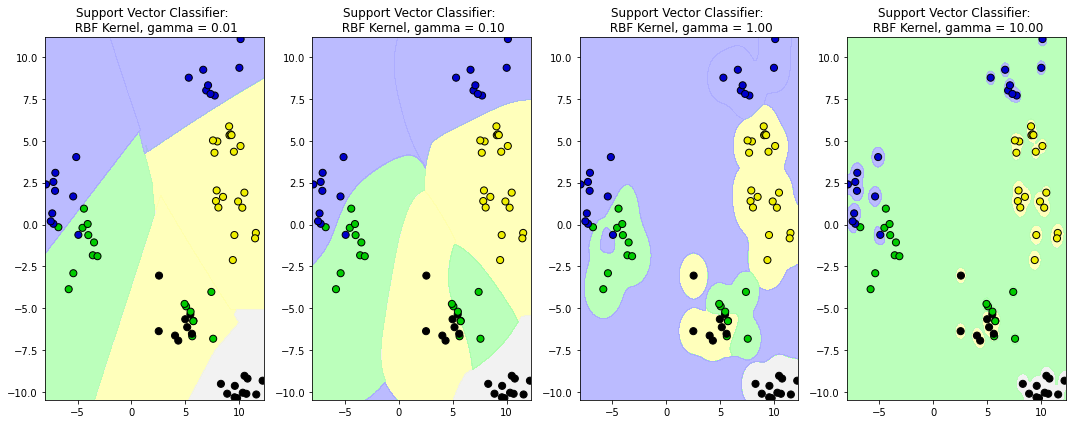

In [30]:
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

fig, subaxes =plt.subplots(1, 4, figsize = (15,6))

for val_gamma, subplot in zip([0.01, .1, 1, 10], subaxes):
    svc_rbf_gamma = SVC(kernel = 'rbf', gamma = val_gamma).fit(X_train, y_train)
    title = 'Support Vector Classifier: \n RBF Kernel, gamma = {:.2f}'.format(val_gamma)
    plot_class_regions_for_classifier_subplot(svc_rbf_gamma, X_train, y_train, 
                                              None, None, title, subplot)
    plt.tight_layout()

<h3>Gamma Value and C-parameters Varitation of RBF Kernel</h3>

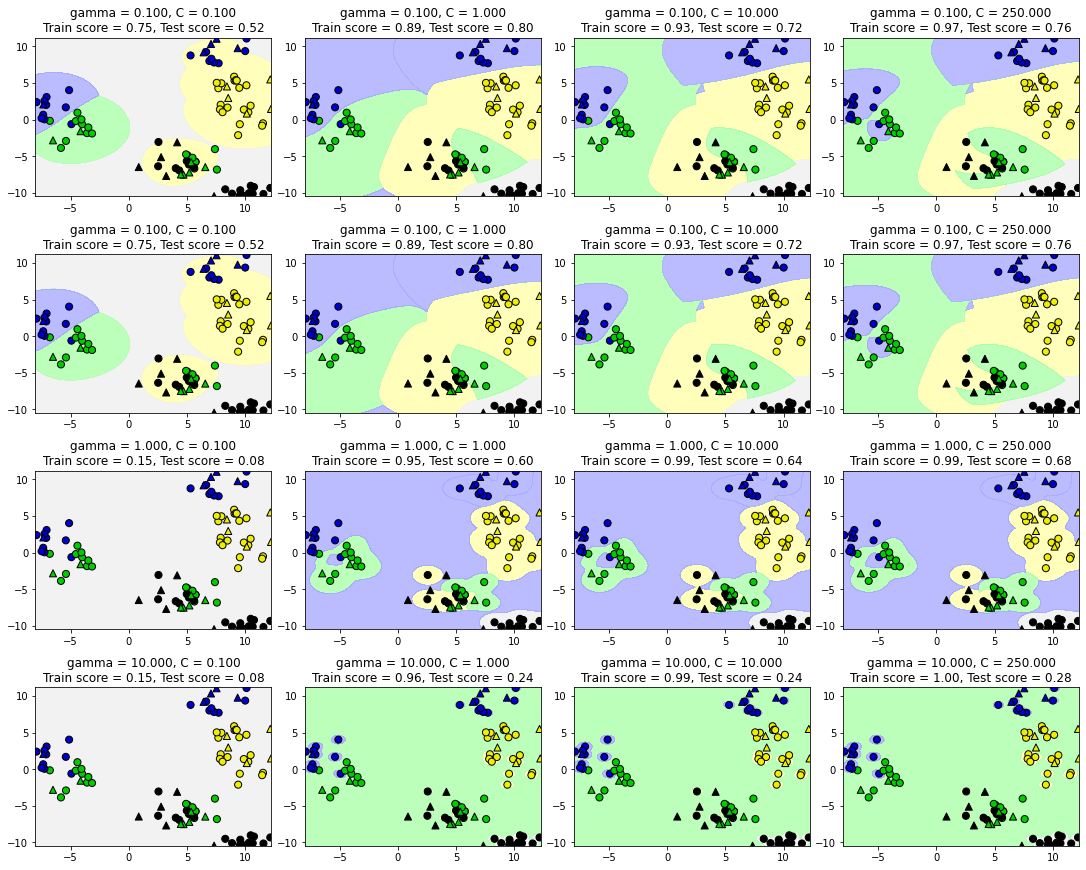

In [41]:
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0) #bydefault train/test : 75/25

fig, subaxes = plt.subplots(4, 4, figsize = (15,12))

for val_gamma, axis in zip([.1, 0.1, 1, 10], subaxes):
    
    for c, subplot in zip([0.1, 1, 10, 250], axis):
        
        title = "gamma = {:.3f}, C = {:.3f}".format(val_gamma, c)
        svc_rbf_c = SVC(kernel = 'rbf', gamma = val_gamma, C = c).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(svc_rbf_c, X_train, y_train, X_test, y_test,
                                                  title, subplot)
        
        plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 1.0)
        

# Apply SVC on Realword Dataset

<h3>without normalization</h3>

<h2>import Libaries</h2>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.svm  import SVC

from adspy_shared_utilities import plot_class_regions_for_classifier_subplot


<h2>import datasets</h2>

In [53]:
from sklearn.datasets import load_breast_cancer

X_cancer, y_cancer = load_breast_cancer(return_X_y = True)

print("shape of X_cancer: \n {}".format(X_cancer.shape))
print("shape of y_cancer: \n {}".format(y_cancer.shape))

print("values of X_cancer: \n {}".format(X_cancer[0:3]))
print("values of y_cancer: \n {}".format(np.unique(y_cancer[0:25])))



shape of X_cancer: 
 (569, 30)
shape of y_cancer: 
 (569,)
values of X_cancer: 
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = SVC(C = 10).fit(X_train, y_train)
print("Breast Cancer Dataset(unnormalized features):")
print("Accuracy of training dataset SVC-RBF-Kernel: \n {}".format(clf.score(X_train, y_train)))
print("Accuracy of testing dataset SVC-RBF-Kernel: \n {}".format(clf.score(X_test, y_test)))

Breast Cancer Dataset(unnormalized features):
Accuracy of training dataset SVC-RBF-Kernel: 
 0.9154929577464789
Accuracy of testing dataset SVC-RBF-Kernel: 
 0.9370629370629371


<h3>without normalization</h3>

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)

print("Breast Cancer Dataset(normalized features):")
print("value of X_train_scaled after preprocessing (MinMaxScaler): \n {}".format(X_train_scaled[:1]))
print("value of X_test_scaled after preprocessing (MinMaxScaler): \n {}".format(X_test_scaled[:1]))
print("Accuracy of training dataset SVC-RBF-Kernel: \n {}".format(clf.score(X_train_scaled, y_train)))
print("Accuracy of testing dataset SVC-RBF-Kernel: \n {}".format(clf.score(X_test_scaled, y_test)))

Breast Cancer Dataset(normalized features):
value of X_train_scaled after preprocessing (MinMaxScaler): 
 [[0.23044157 0.32157676 0.21940433 0.12267232 0.33767785 0.12684063
  0.06298032 0.11332008 0.41161616 0.15143218 0.03458265 0.19353412
  0.02247562 0.0124343  0.27210066 0.12240273 0.03565657 0.1624929
  0.18735302 0.03072012 0.18249733 0.36593817 0.16903232 0.081744
  0.43406194 0.14408515 0.10511182 0.31484671 0.30277942 0.09858323]]
value of X_test_scaled after preprocessing (MinMaxScaler): 
 [[0.30380046 0.44854772 0.30993021 0.17527041 0.62962963 0.43668242
  0.33856607 0.40616302 0.53333333 0.49052233 0.10106826 0.12555836
  0.11006926 0.04942689 0.17120785 0.1958559  0.08717172 0.25269937
  0.17111501 0.10745132 0.301672   0.47014925 0.31321281 0.16201337
  0.56943802 0.34763416 0.40782748 0.70651051 0.39818648 0.36639118]]
Accuracy of training dataset SVC-RBF-Kernel: 
 0.9882629107981221
Accuracy of testing dataset SVC-RBF-Kernel: 
 0.972027972027972
